# KS Test for Multi-Zone Outputs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from multizone_stars import MultizoneStars
from apogee_tools import import_apogee, apogee_region, apogee_mdf
import paths
import _globals
from utils import get_bin_centers

In [2]:
apogee_data = import_apogee()
mzs1 = MultizoneStars.from_output('gaussian/insideout/plateau_width10/diskmodel')
mzs2 = MultizoneStars.from_output('gaussian/insideout/prompt/diskmodel')

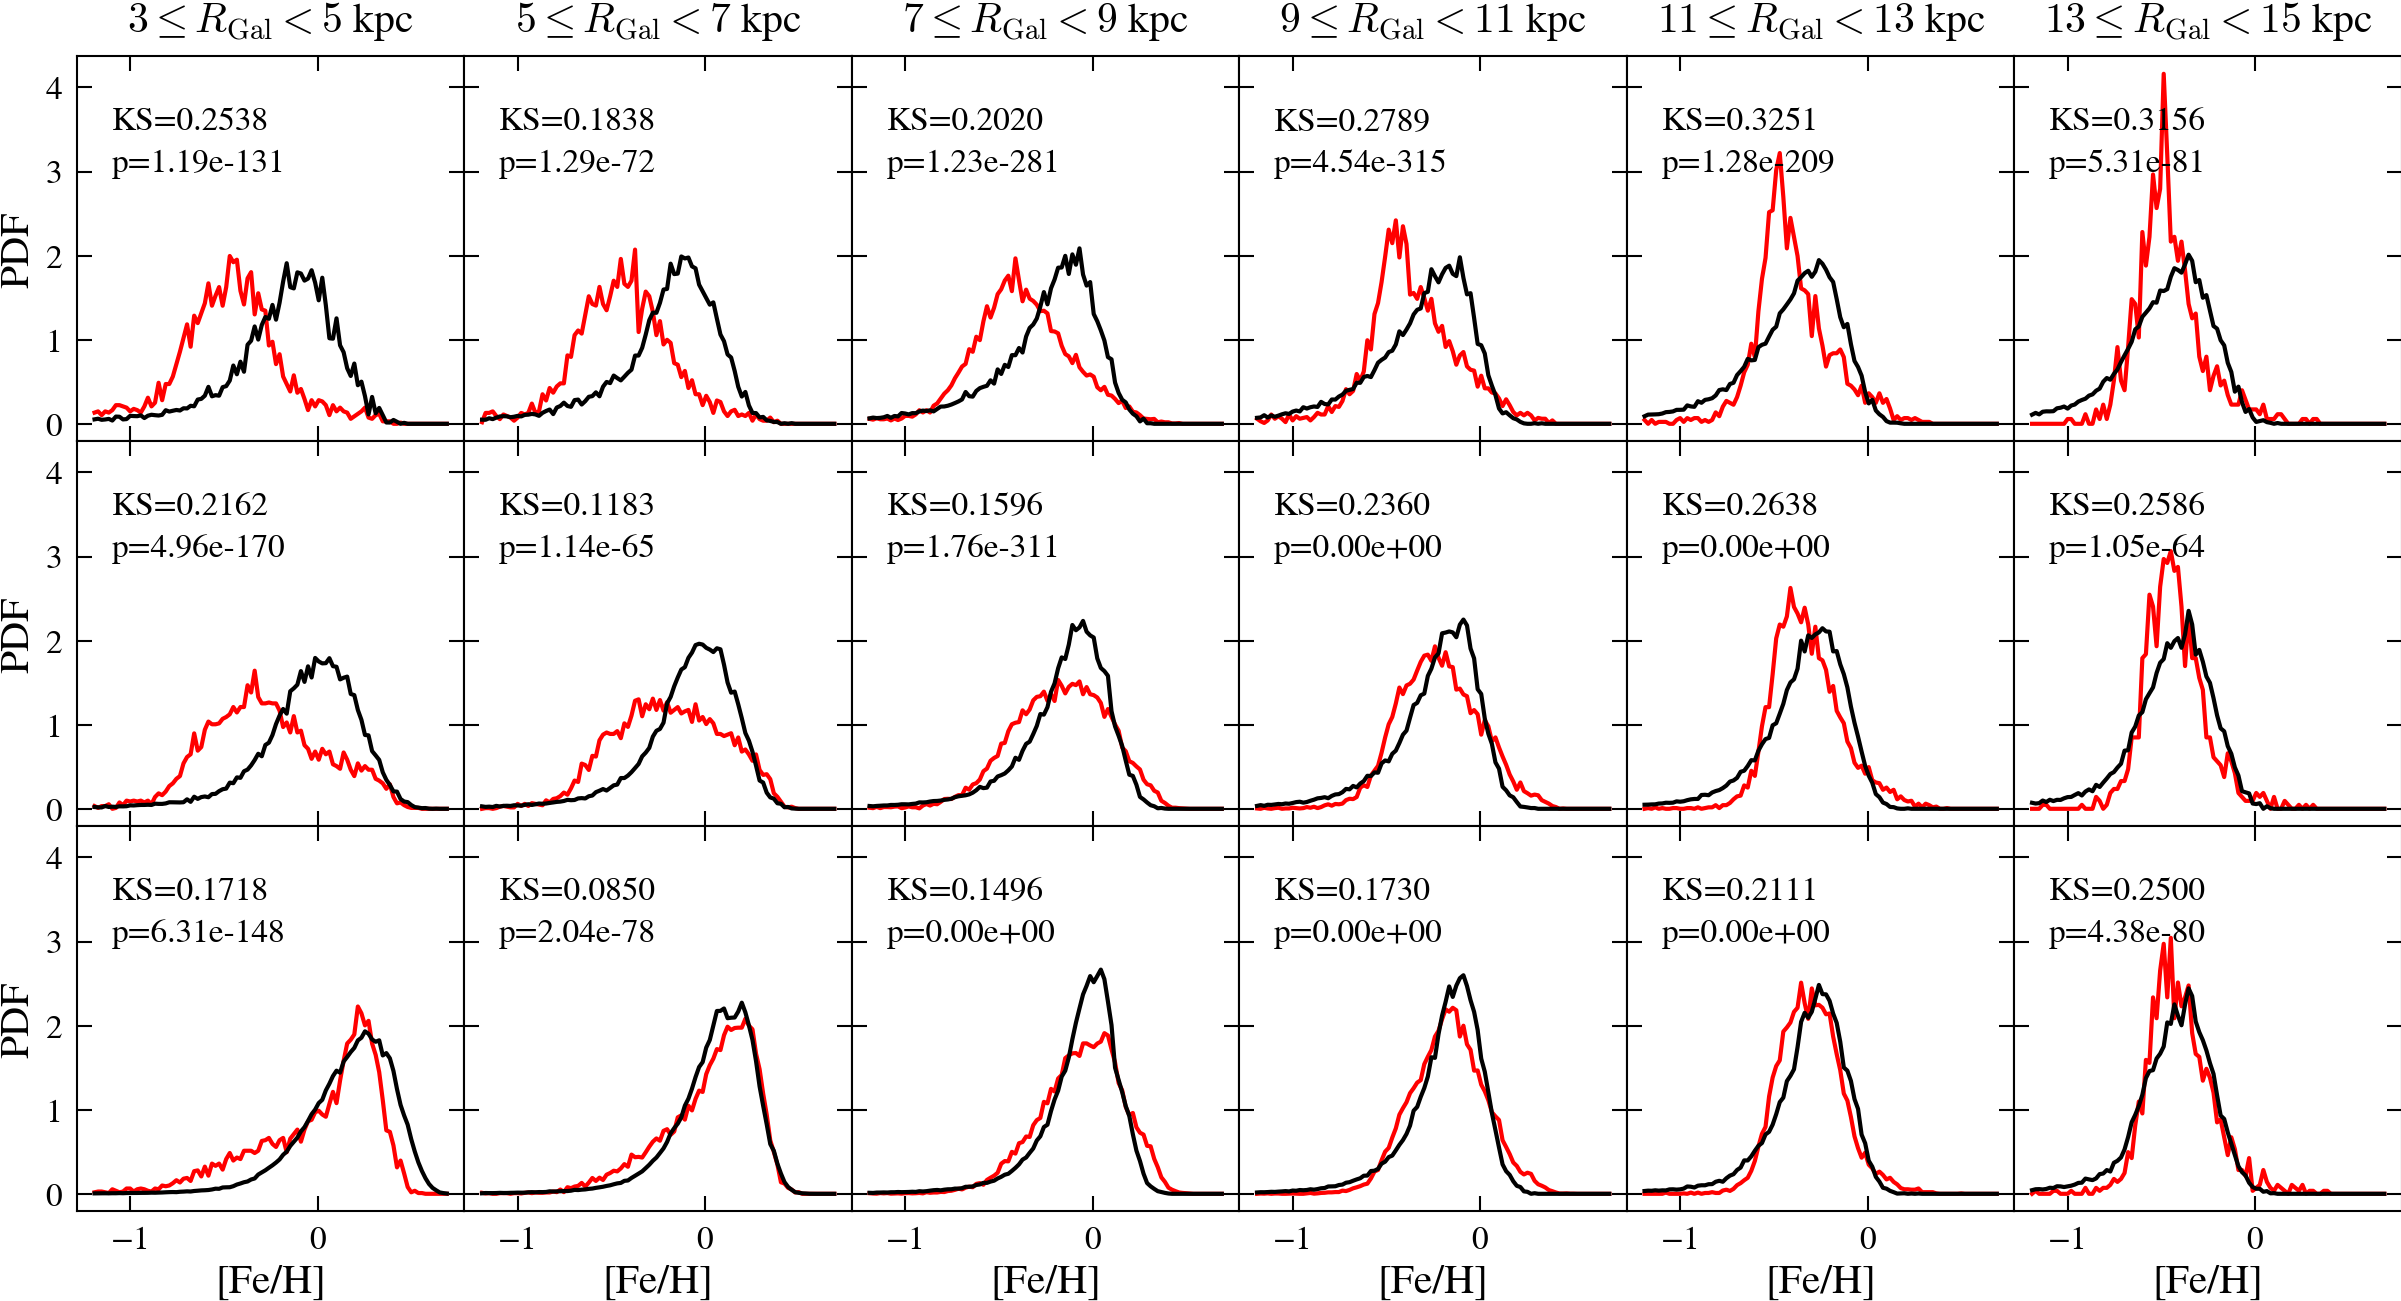

In [6]:
fig, axs = plt.subplots(len(_globals.ABSZ_BINS)-1, len(_globals.GALR_BINS)-1,
                        figsize=(10, 5), sharex=True, sharey=True)
plt.style.use(paths.styles / 'paper.mplstyle')
fig.subplots_adjust(wspace=0., hspace=0.)
xrange = (-1.2, 0.7)
stats = []
weights = []
pvals = []
for i, row in enumerate(axs):
    absz_lim = (_globals.ABSZ_BINS[-(i+2)], _globals.ABSZ_BINS[-(i+1)])
    for j, ax in enumerate(row):
        galr_lim = (_globals.GALR_BINS[j], _globals.GALR_BINS[j+1])
        # APOGEE DF
        apogee_subset = apogee_region(apogee_data, galr_lim, absz_lim)
        apogee_df, bin_edges = apogee_mdf(apogee_subset, col='FE_H', 
                                          range=xrange, smoothing=0.)
        ax.plot(get_bin_centers(bin_edges), apogee_df, 
                color='r', linewidth=1)
        # VICE DF
        vice_subset = mzs1.model_uncertainty(apogee_data).region(galr_lim, absz_lim)
        vice_df, bin_edges = vice_subset.mdf(col='[fe/h]', range=xrange, smoothing=0.)
        ax.plot(get_bin_centers(bin_edges), vice_df,
                color='k', linewidth=1)
        # KS test
        ksres = ks_2samp(apogee_subset['FE_H'], vice_subset('[fe/h]'), 
                         alternative='two-sided')
        ax.text(-1.1, 3.5, f'KS={ksres.statistic:.4f}')
        ax.text(-1.1, 3, f'p={ksres.pvalue:.2e}')
        stats.append(ksres.statistic)
        weights.append(apogee_subset.shape[0])
        pvals.append(ksres.pvalue)
        # ax.text(0, 0, '%s, %s' % (i, j))
for i, ax in enumerate(axs[0,:]):
    ax.set_title(r'$%s\leq R_{\rm{Gal}} < %s$ kpc' % (_globals.GALR_BINS[i], _globals.GALR_BINS[i+1]))
for ax in axs[-1,:]:
    ax.set_xlabel('[Fe/H]')
for ax in axs[:,0]:
    ax.set_ylabel('PDF')
plt.show()

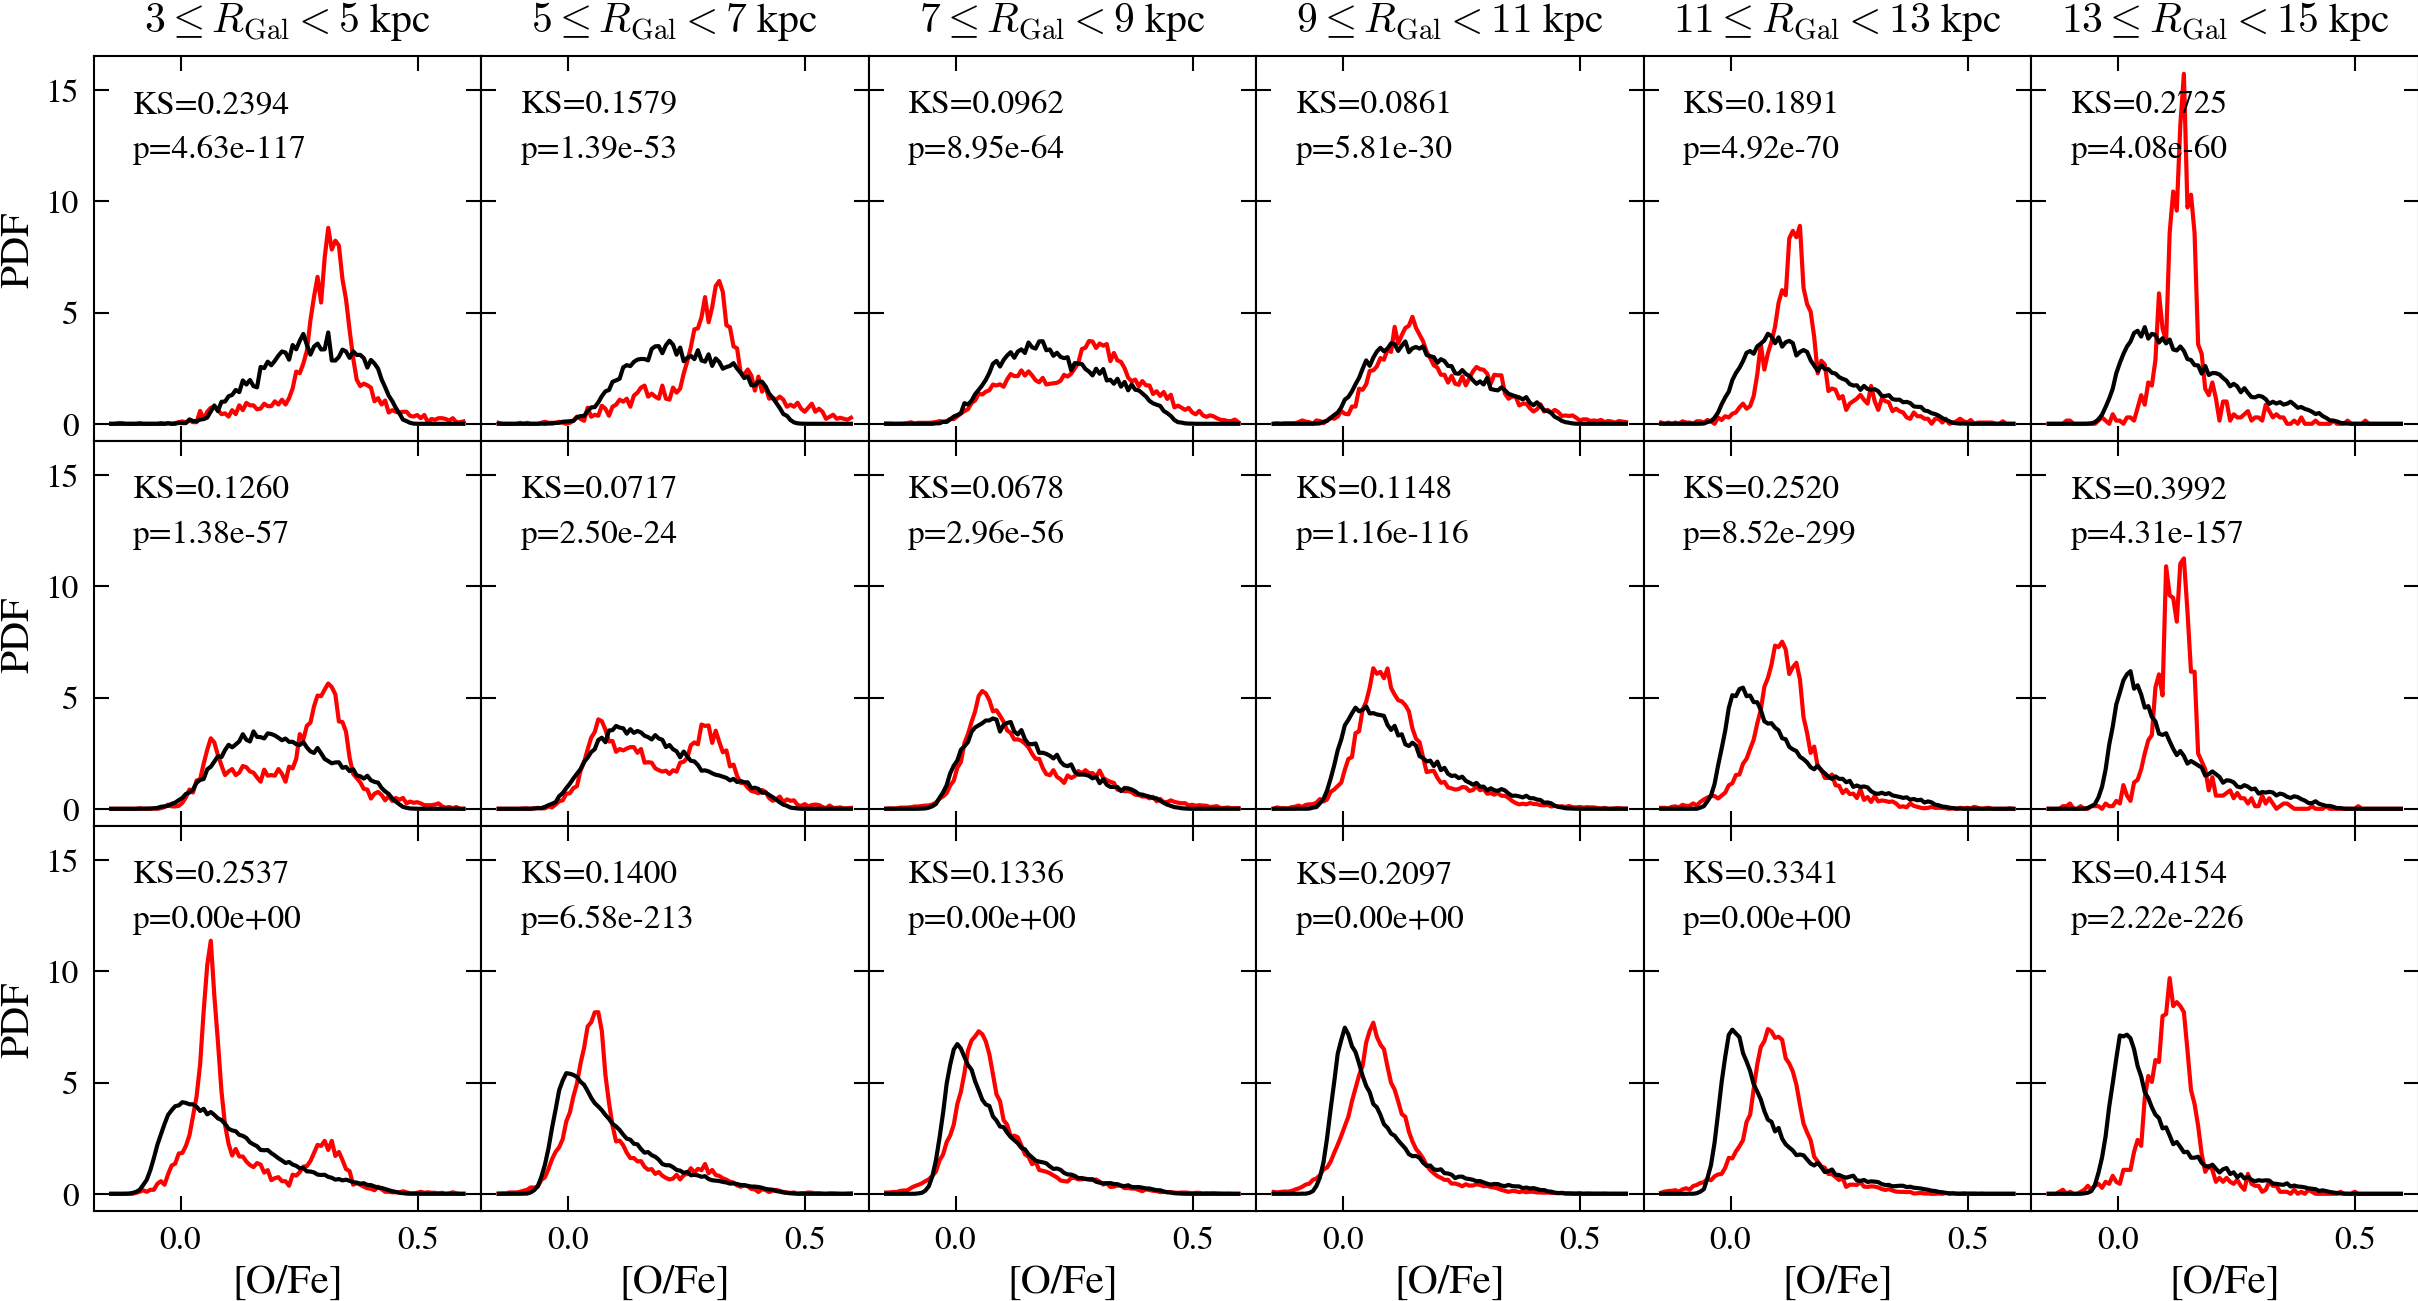

In [32]:
fig, axs = plt.subplots(len(_globals.ABSZ_BINS)-1, len(_globals.GALR_BINS)-1,
                        figsize=(10, 5), sharex=True, sharey=True)
plt.style.use(paths.styles / 'paper.mplstyle')
fig.subplots_adjust(wspace=0., hspace=0.)
xrange = (-0.15, 0.6)
stats = []
weights = []
pvals = []
for i, row in enumerate(axs):
    absz_lim = (_globals.ABSZ_BINS[-(i+2)], _globals.ABSZ_BINS[-(i+1)])
    for j, ax in enumerate(row):
        galr_lim = (_globals.GALR_BINS[j], _globals.GALR_BINS[j+1])
        # APOGEE DF
        apogee_subset = apogee_region(apogee_data, galr_lim, absz_lim)
        apogee_df, bin_edges = apogee_mdf(apogee_subset, col='O_FE', 
                                          range=xrange, smoothing=0.)
        ax.plot(get_bin_centers(bin_edges), apogee_df, 
                color='r', linewidth=1)
        # VICE DF
        vice_subset = mzs1.model_uncertainty(apogee_data).region(galr_lim, absz_lim)
        vice_df, bin_edges = vice_subset.mdf(col='[o/fe]', range=xrange, smoothing=0.)
        ax.plot(get_bin_centers(bin_edges), vice_df,
                color='k', linewidth=1)
        # KS test
        ksres = ks_2samp(apogee_subset['O_FE'], vice_subset('[o/fe]'), 
                         alternative='two-sided')
        ax.text(-0.1, 14, f'KS={ksres.statistic:.4f}')
        ax.text(-0.1, 12, f'p={ksres.pvalue:.2e}')
        stats.append(ksres.statistic)
        weights.append(apogee_subset.shape[0])
        pvals.append(ksres.pvalue)
        # ax.text(0, 0, '%s, %s' % (i, j))
for i, ax in enumerate(axs[0,:]):
    ax.set_title(r'$%s\leq R_{\rm{Gal}} < %s$ kpc' % (_globals.GALR_BINS[i], _globals.GALR_BINS[i+1]))
for ax in axs[-1,:]:
    ax.set_xlabel('[O/Fe]')
for ax in axs[:,0]:
    ax.set_ylabel('PDF')
plt.show()

In [33]:
np.average(stats, weights=weights)

0.16117781770417766

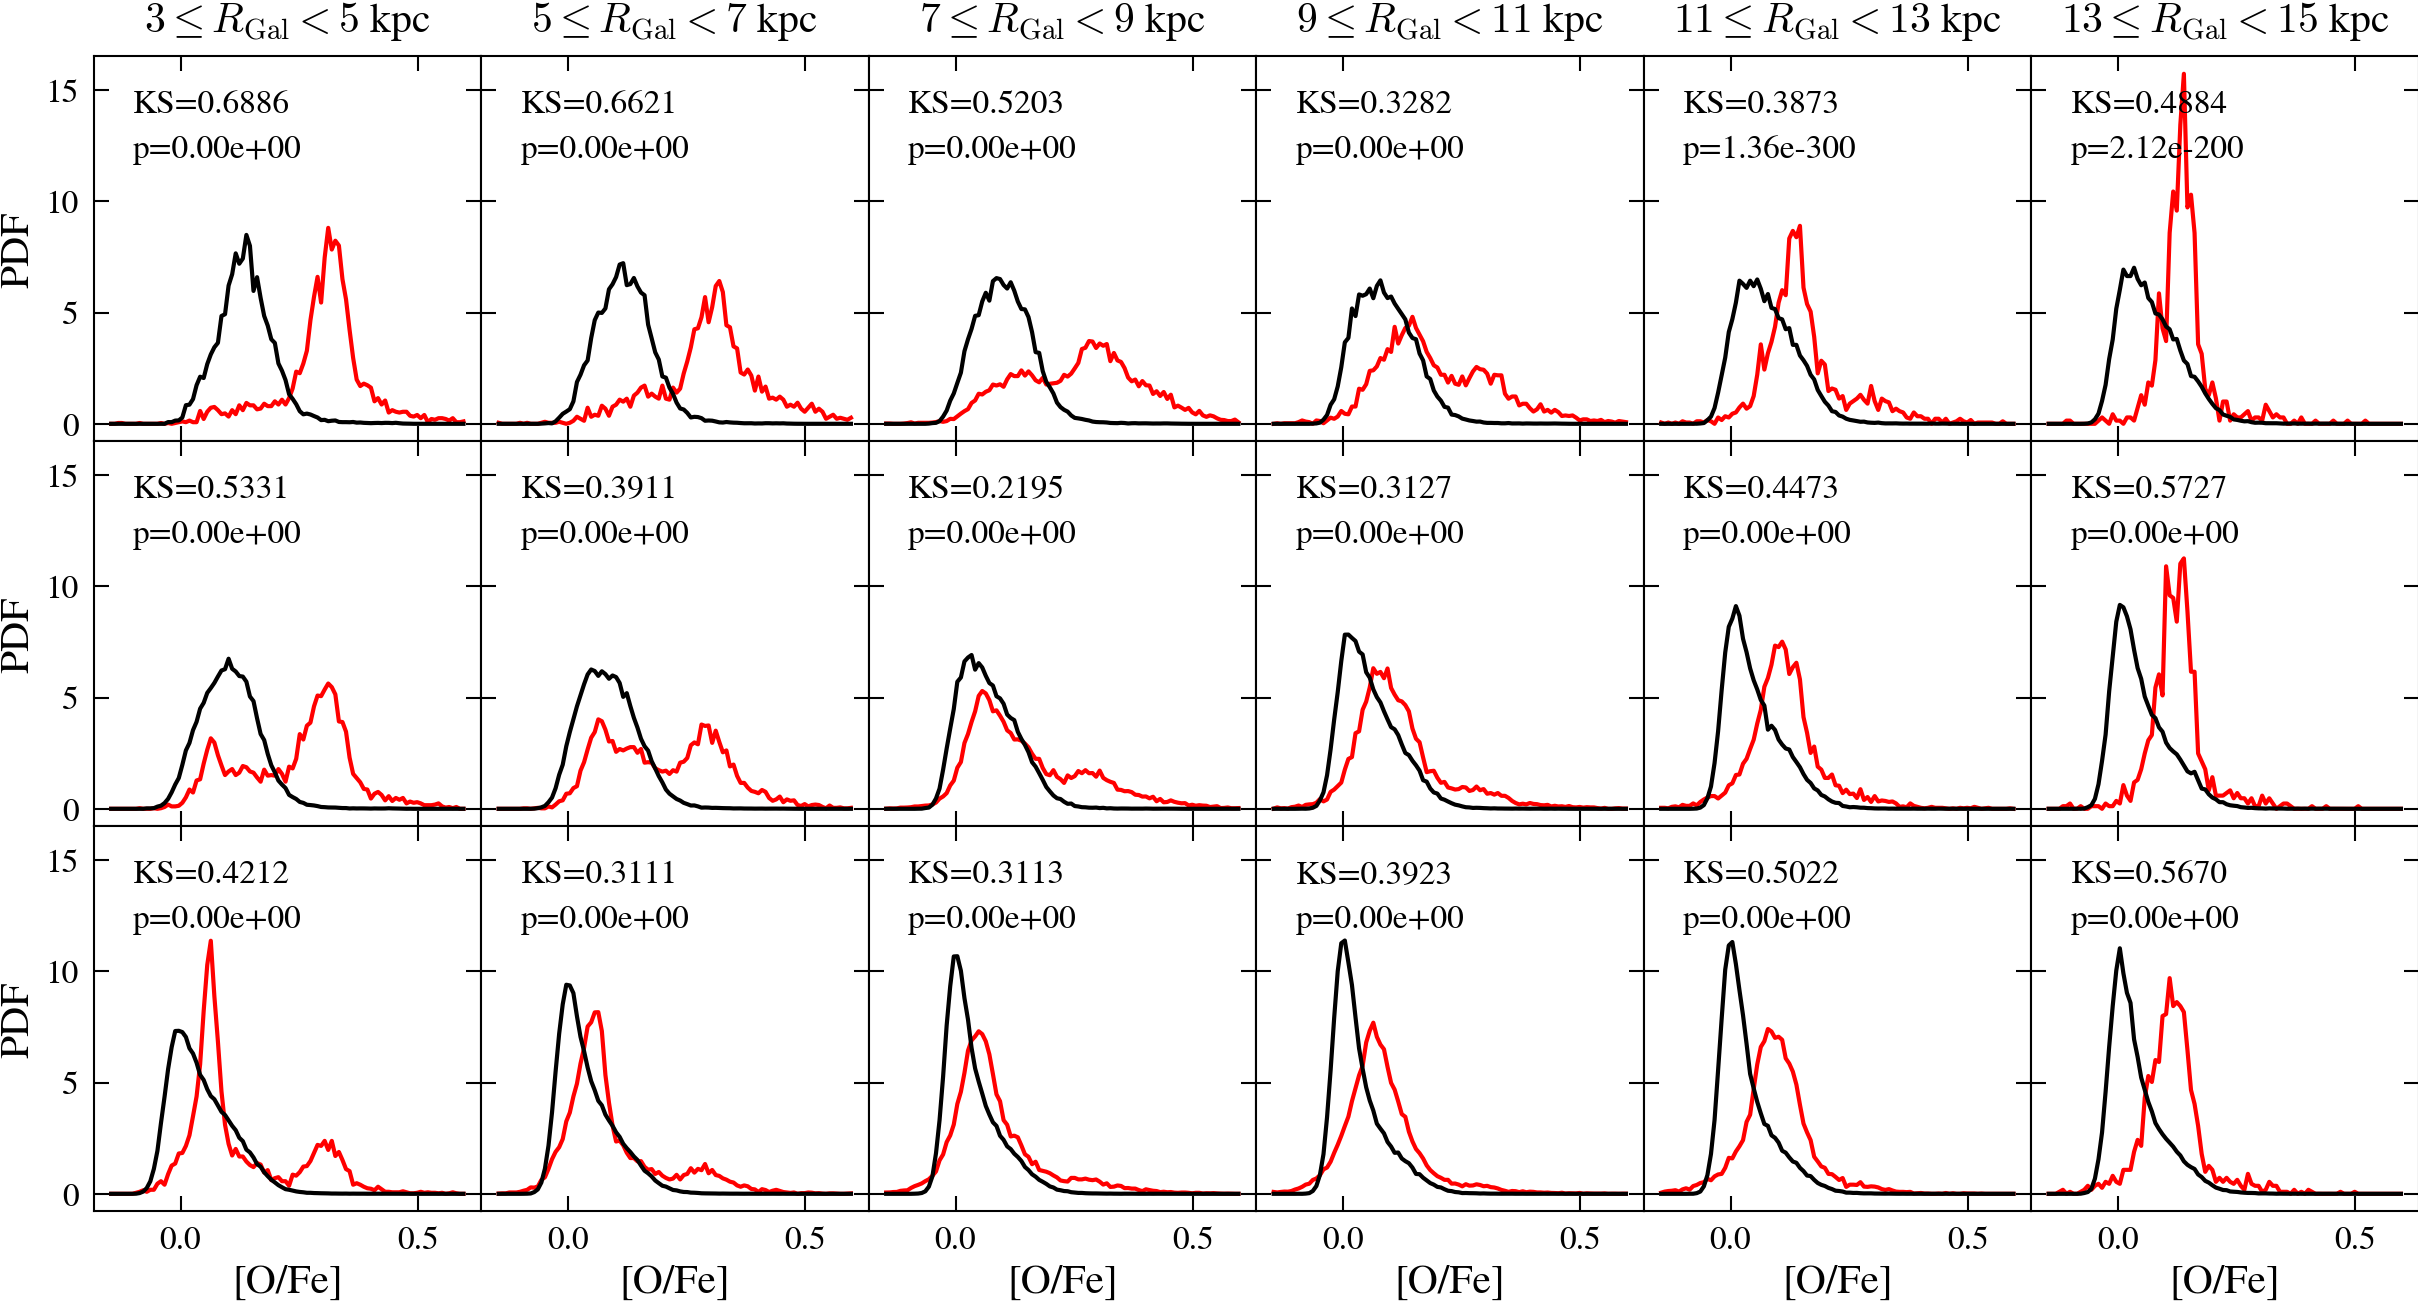

In [38]:
fig, axs = plt.subplots(len(_globals.ABSZ_BINS)-1, len(_globals.GALR_BINS)-1,
                        figsize=(10, 5), sharex=True, sharey=True)
plt.style.use(paths.styles / 'paper.mplstyle')
fig.subplots_adjust(wspace=0., hspace=0.)
xrange = (-0.15, 0.6)
stats = []
pvals = []
weights = []
for i, row in enumerate(axs):
    absz_lim = (_globals.ABSZ_BINS[-(i+2)], _globals.ABSZ_BINS[-(i+1)])
    for j, ax in enumerate(row):
        galr_lim = (_globals.GALR_BINS[j], _globals.GALR_BINS[j+1])
        # APOGEE DF
        apogee_subset = apogee_region(apogee_data, galr_lim, absz_lim)
        apogee_df, bin_edges = apogee_mdf(apogee_subset, col='O_FE', 
                                          range=xrange, smoothing=0.)
        ax.plot(get_bin_centers(bin_edges), apogee_df, 
                color='r', linewidth=1)
        # VICE DF
        vice_subset = mzs2.model_uncertainty(apogee_data).region(galr_lim, absz_lim)
        vice_df, bin_edges = vice_subset.mdf(col='[o/fe]', range=xrange, smoothing=0.)
        ax.plot(get_bin_centers(bin_edges), vice_df,
                color='k', linewidth=1)
        # KS test
        ksres = ks_2samp(apogee_subset['O_FE'], vice_subset('[o/fe]'), 
                         alternative='two-sided')
        ax.text(-0.1, 14, f'KS={ksres.statistic:.4f}')
        ax.text(-0.1, 12, f'p={ksres.pvalue:.2e}')
        stats.append(ksres.statistic)
        pvals.append(ksres.pvalue)
        weights.append(apogee_subset.shape[0])
        # ax.text(0, 0, '%s, %s' % (i, j))
for i, ax in enumerate(axs[0,:]):
    ax.set_title(r'$%s\leq R_{\rm{Gal}} < %s$ kpc' % (_globals.GALR_BINS[i], _globals.GALR_BINS[i+1]))
for ax in axs[-1,:]:
    ax.set_xlabel('[O/Fe]')
for ax in axs[:,0]:
    ax.set_ylabel('PDF')
plt.show()

In [35]:
np.average(stats, weights=weights)

0.380165632590292

In [21]:
mzs3 = MultizoneStars.from_output('gaussian/earlyburst/plateau_width10/diskmodel')

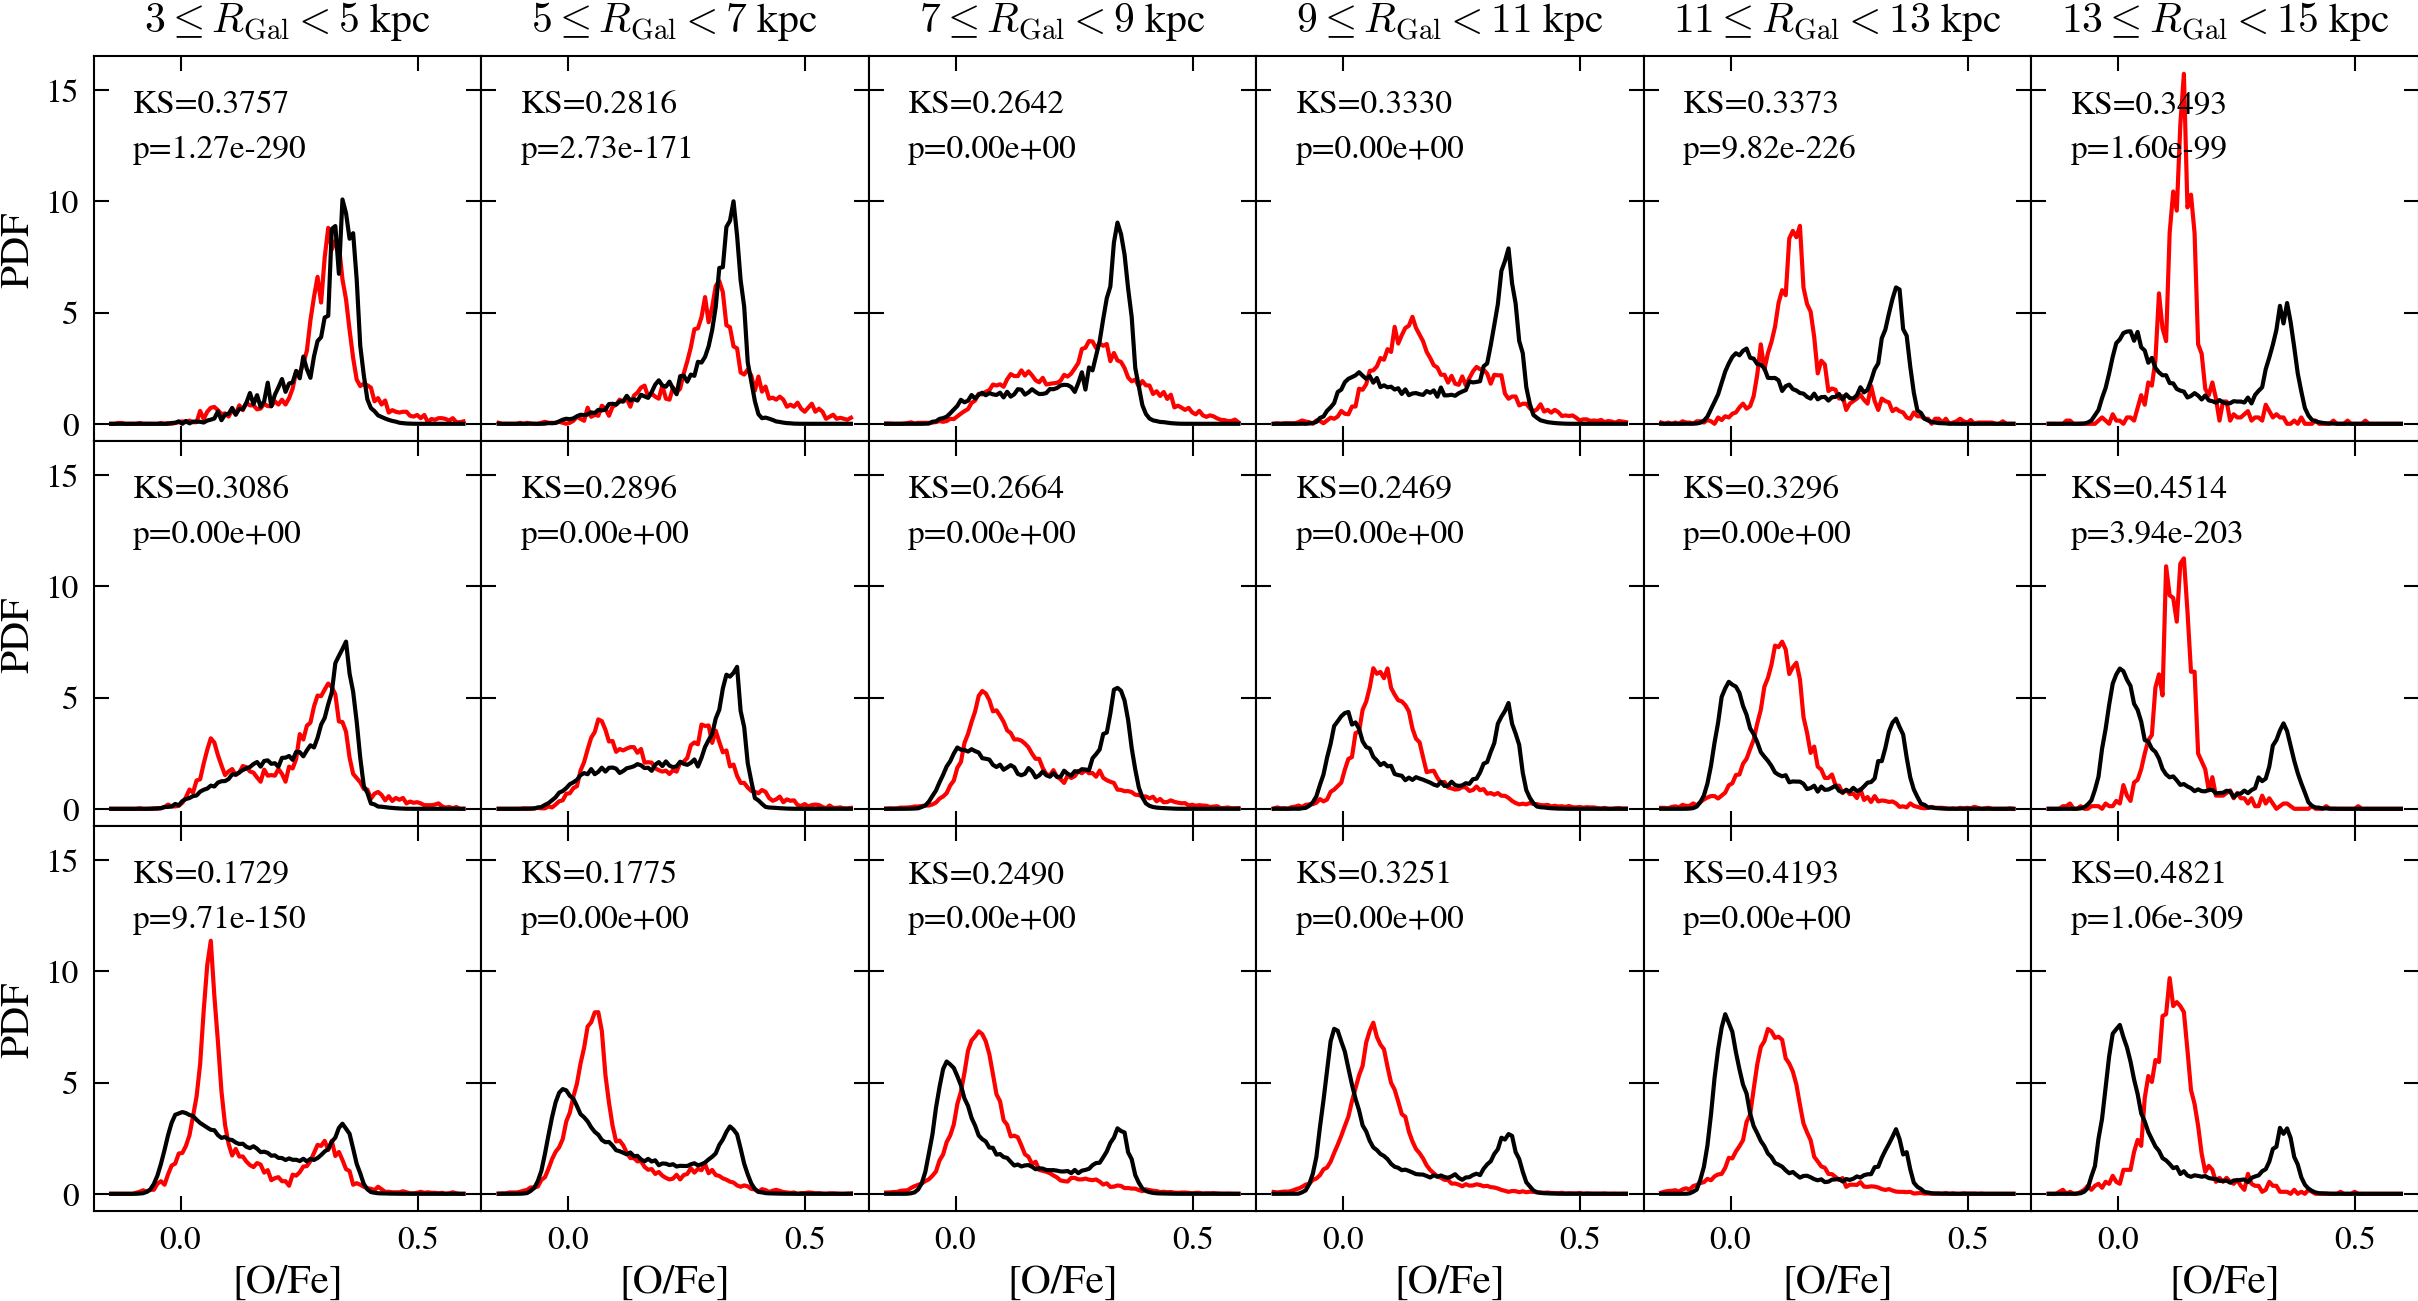

In [39]:
fig, axs = plt.subplots(len(_globals.ABSZ_BINS)-1, len(_globals.GALR_BINS)-1,
                        figsize=(10, 5), sharex=True, sharey=True)
plt.style.use(paths.styles / 'paper.mplstyle')
fig.subplots_adjust(wspace=0., hspace=0.)
xrange = (-0.15, 0.6)
stats = []
pvals = []
weights = []
for i, row in enumerate(axs):
    absz_lim = (_globals.ABSZ_BINS[-(i+2)], _globals.ABSZ_BINS[-(i+1)])
    for j, ax in enumerate(row):
        galr_lim = (_globals.GALR_BINS[j], _globals.GALR_BINS[j+1])
        # APOGEE DF
        apogee_subset = apogee_region(apogee_data, galr_lim, absz_lim)
        apogee_df, bin_edges = apogee_mdf(apogee_subset, col='O_FE', 
                                          range=xrange, smoothing=0.)
        ax.plot(get_bin_centers(bin_edges), apogee_df, 
                color='r', linewidth=1)
        # VICE DF
        vice_subset = mzs3.model_uncertainty(apogee_data).region(galr_lim, absz_lim)
        vice_df, bin_edges = vice_subset.mdf(col='[o/fe]', range=xrange, smoothing=0.)
        ax.plot(get_bin_centers(bin_edges), vice_df,
                color='k', linewidth=1)
        # KS test
        ksres = ks_2samp(apogee_subset['O_FE'], vice_subset('[o/fe]'), 
                         alternative='two-sided')
        ax.text(-0.1, 14, f'KS={ksres.statistic:.4f}')
        ax.text(-0.1, 12, f'p={ksres.pvalue:.2e}')
        stats.append(ksres.statistic)
        pvals.append(ksres.pvalue)
        weights.append(apogee_subset.shape[0])
        # ax.text(0, 0, '%s, %s' % (i, j))
for i, ax in enumerate(axs[0,:]):
    ax.set_title(r'$%s\leq R_{\rm{Gal}} < %s$ kpc' % (_globals.GALR_BINS[i], _globals.GALR_BINS[i+1]))
for ax in axs[-1,:]:
    ax.set_xlabel('[O/Fe]')
for ax in axs[:,0]:
    ax.set_ylabel('PDF')
plt.show()

In [37]:
np.average(stats, weights=weights)

0.2851354762201785